In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from dateutil import parser
from datetime import datetime


# CLEAN dataframe for training
## Scale
* Minutes for arrival
* Time of day (minutes since midnight)
* Day of week (0-6)
* Day of month (0-30)
* Day of the year (0-364)
* Month (0-11)
* Year
* Lat
* Long

## Categorical
* Crime category
* Geo Code



In [15]:
incidents_df = pd.read_csv("data/cleaned_data_no_zeros.csv", sep = None, dtype={'INCIDENT': np.str_, 'DATE OCCURRED': np.str_, 'TIME OCCURED' : np.str_, 'YEAR OCCURRED': np.int_, 'MONTH OCCURRED': np.int_, 'DATE REPORTED': np.str_, 'TIME ARRIVED': np.str_, 'DATE ARRIVED': np.str_, 'GEO CODE': np.str_, 'HOUSE NUMBER BLOCK': np.str_, 'STREET': np.str_, 'CRIME CODE': np.float64, 'CRIME DESCRIPTION': np.str_, 'CRIME CATEGORY': np.str_, 'CRIME CATEGORY DESCRIPTION': np.str_, 'CSA DESCRIPTION': np.str_, 'PLACE CODE DESCRIPTION': np.str_, 'WEAPONS CODE 1': np.str_, 'WEAPON 1 DESCRIPTION': np.str_, 'WEAPONS CODE 2': np.str_, 'WEAPON 2 DESCRIPTION': np.str_, 'WEAPONS CODE 3': np.str_, 'WEAPON 3 DESCRIPTION': np.str_, 'BIAS CODE': np.float64, 'BIAS DESCRIPTION': np.str_, 'STATUS CODE': np.float64, 'STATUS DESCRIPTION': np.str_, 'COUNTER': int, 'MAPPING ADDRESS': np.str_}, engine = 'python')

In [16]:
#pd.set_option('display.max_columns', None)

#incidents_df.head()

In [17]:
length = len(incidents_df)
count = [1] * length
incidents_df['COUNT'] = count
simple_df = incidents_df[['CRIME CATEGORY DESCRIPTION','RESPONSE TIME','MINS OF DAY', 'DAY OF WEEK', 'DAY OF MONTH', 'DAY OF YEAR', 'MONTH OCCURRED', 'YEAR OCCURRED','GEO CODE', 'LATITUDE', 'LONGITUDE', 'COUNT']]
# simple_df = simple_df[simple_df['LONGITUDE'].notna()]

<AxesSubplot:>

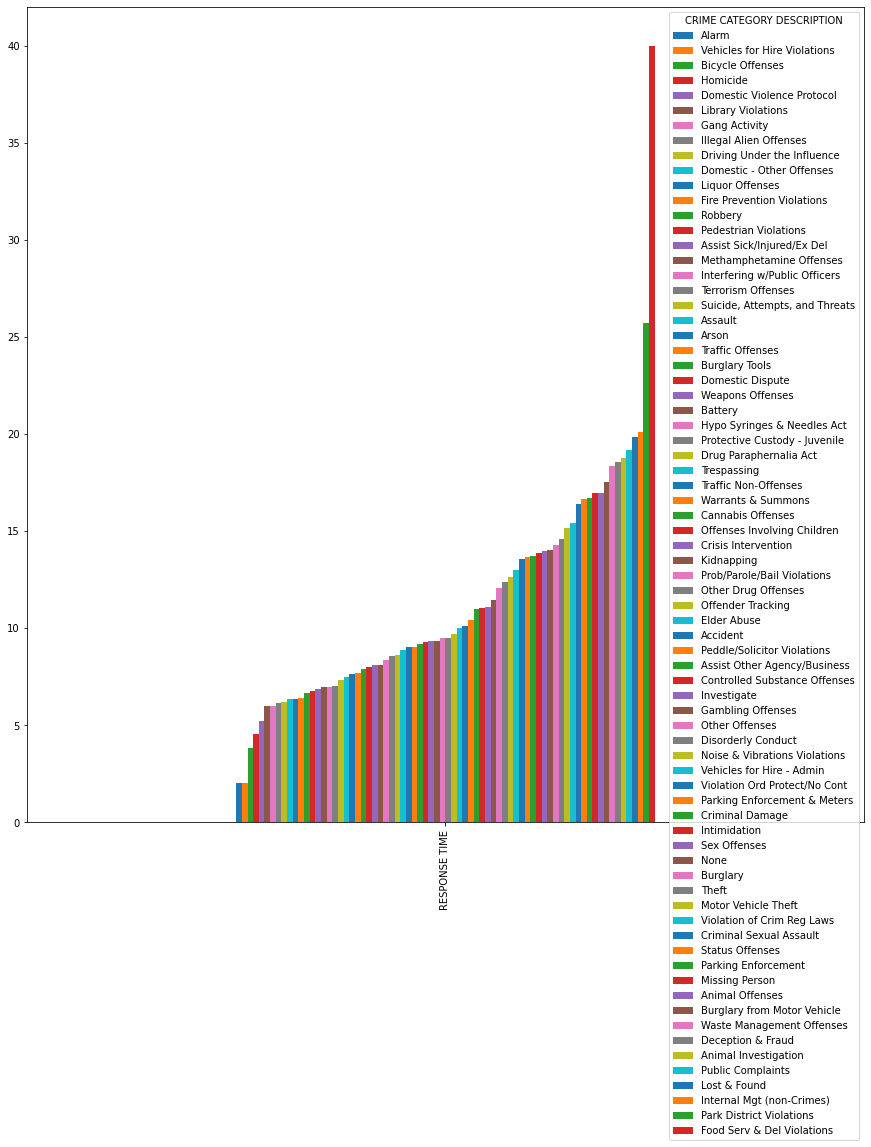

In [18]:
#remove rows with invalid time column value
#this method could take a while!

# simple_df.drop(err)
s = simple_df.pivot_table(values ='RESPONSE TIME', columns=['CRIME CATEGORY DESCRIPTION'], aggfunc=np.mean).sort_values(by='RESPONSE TIME', axis=1)
#s.head()
s.plot.bar(figsize=(15,15))

In [19]:
simple_df.head(10)
t = simple_df[['RESPONSE TIME']]
t = t[t['RESPONSE TIME'].notna()]
t["RESPONSE TIME"].mode()


0    4.0
dtype: float64

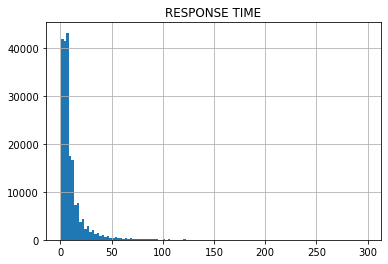

In [20]:
hist = t.hist(bins=120)

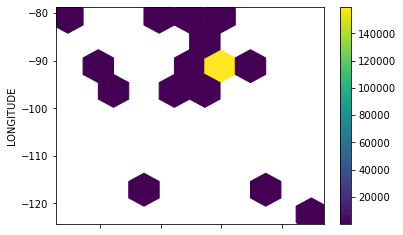

In [21]:
ax = simple_df.plot.hexbin(x='LATITUDE',
                    y='LONGITUDE',
                    C='COUNT',
                    reduce_C_function=np.sum,
                    gridsize=8,
                    cmap="viridis")

In [22]:
incidents_df['CRIME CATEGORY DESCRIPTION'].value_counts()

Battery                       22899
Theft                         21709
Domestic Dispute              18946
Criminal Damage               14623
Accident                      14311
                              ...  
Library Violations                1
Terrorism Offenses                1
Food Serv & Del Violations        1
Alarm                             1
Gang Activity                     1
Name: CRIME CATEGORY DESCRIPTION, Length: 74, dtype: int64